In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [3]:
#importamos archivo csv
my_data = pd.read_csv('./E-Commerce_train.csv', sep = ';')


In [4]:
#eliminamos columna ID, no la usaremos y a la vez vemos si hay datos nulos
my_data = my_data.drop("ID",axis=1)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 773.5+ KB


In [6]:
#cambio columnas a español
renombrar = ["almacen","envio","llamadas_clientes","valoracion_clientes","coste_producto","compras_anteriores","importancia_producto","genero","descuento","peso_gramos","entrega_a_tiempo"]
my_data.columns = renombrar
my_data

,almacen,envio,llamadas_clientes,valoracion_clientes,coste_producto,compras_anteriores,importancia_producto,genero,descuento,peso_gramos,entrega_a_tiempo
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8994,D,Ship,3,1,217,3,low,F,1,4177,1
8995,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,B,Ship,4,2,184,3,medium,F,5,5931,1


In [7]:
#contar los valores unicos en la columna..
my_data["entrega_a_tiempo"].value_counts()

1    5719
0    3280
Name: entrega_a_tiempo, dtype: int64

In [9]:
#pasamos datos numeros
Producto = {"low":"1","medium":"2","high":"3"}
Genero = {"F":"1","M":"2"}
Almacen = {"A":"1","B":"2","C":"3","D":"4","F":"5"}
Envio = {"Road":"1","Flight":"2","Ship":"3"}
my_dataTrain = my_data.replace({"importancia_producto":"Producto", "genero":"Genero", "almacen":"Almacen", "envio":"Envio" })

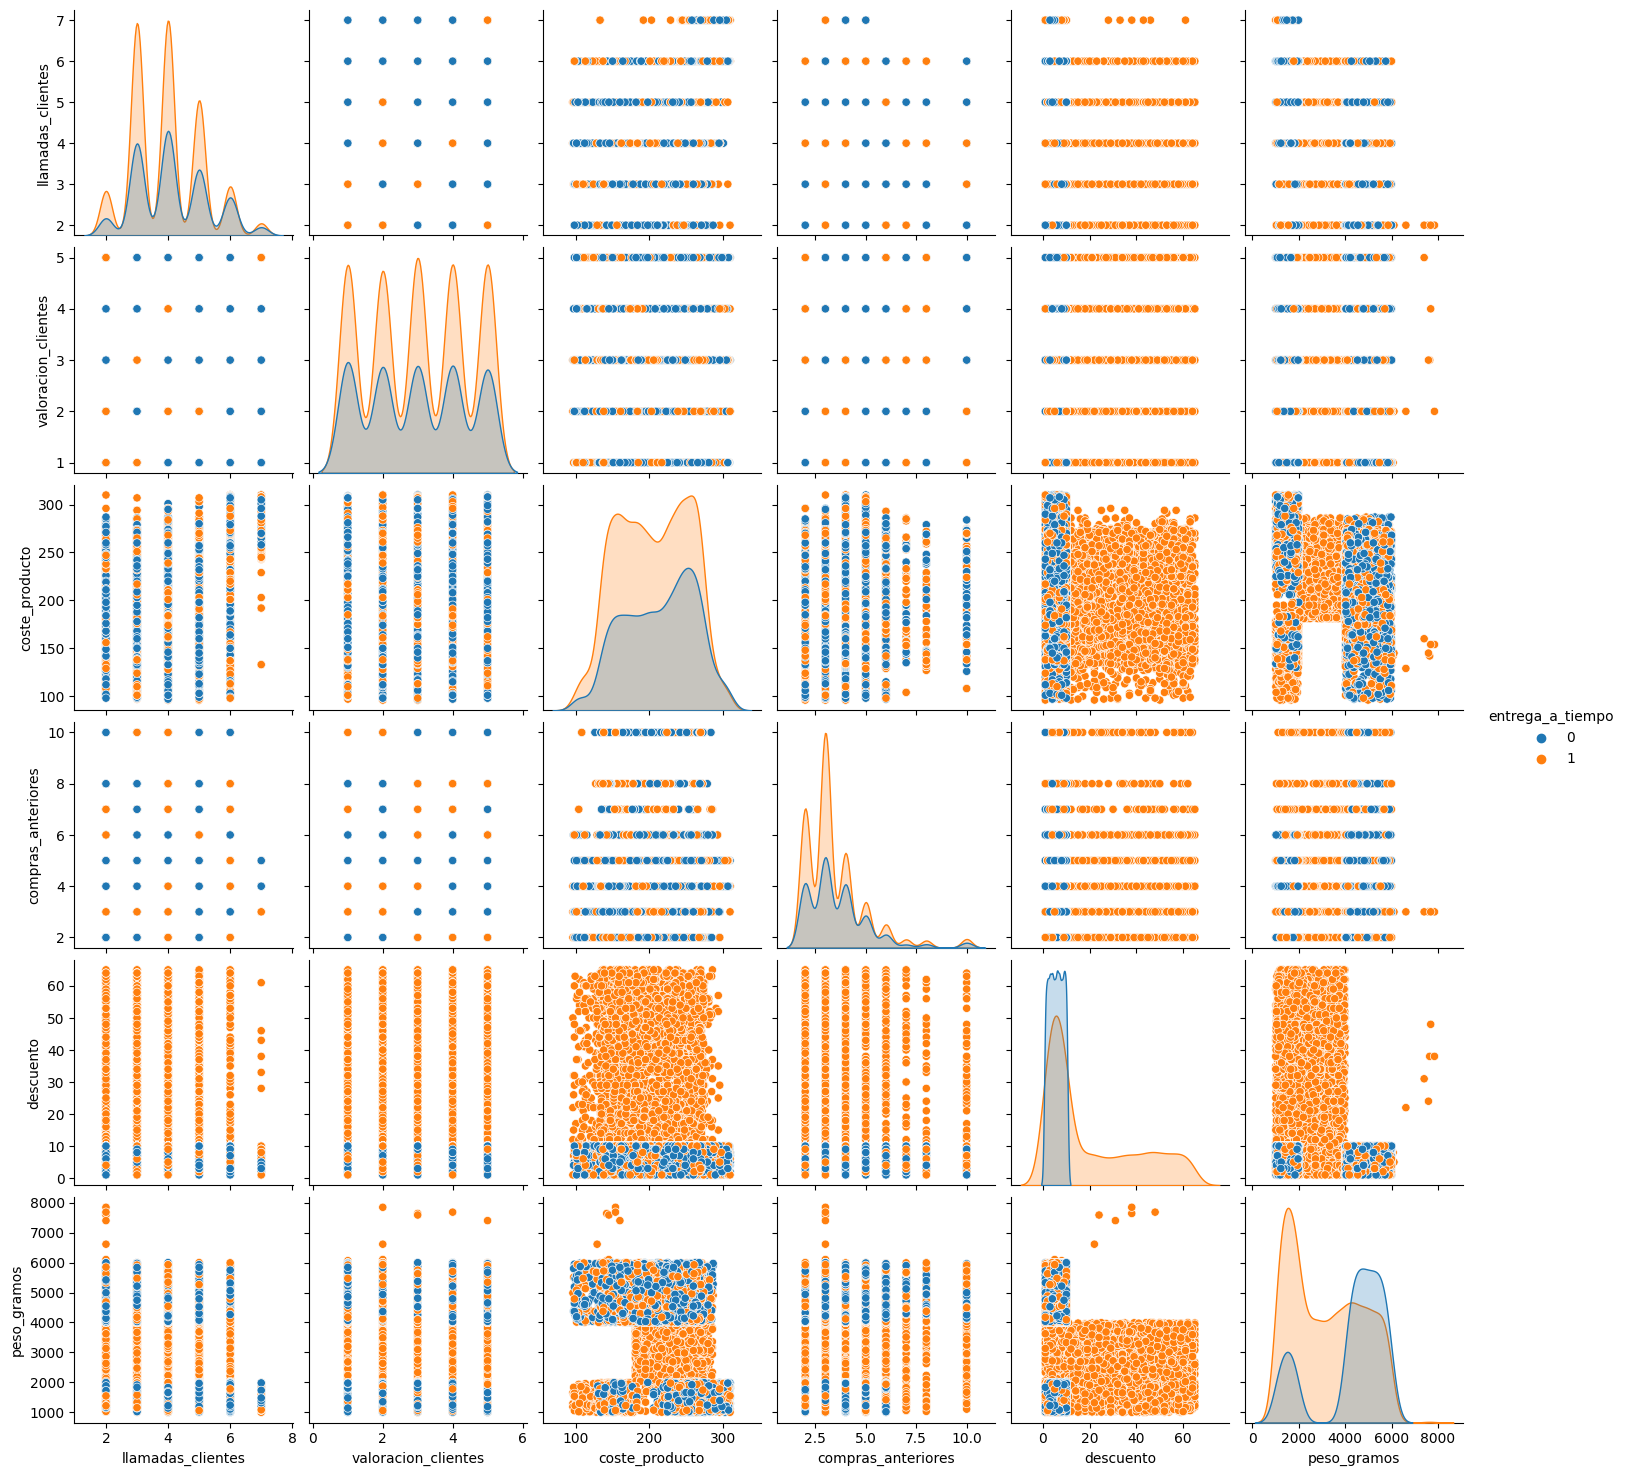

In [10]:
#hacemos un pairplot
sns.pairplot(my_dataTrain,hue = "entrega_a_tiempo")
plt.show()

pairplot:<br> 
*Se observa que cuando hay un descuento mayor a 10%, se entrega a tiempo el pedido<br>
*Se observa que el peso cuando esta en el intervalo de 2000 a 4000 gramos, se entrega    a tiempo el pedido

In [13]:
#marcarmos el objetivo
y = my_data["entrega_a_tiempo"]
X = my_data.drop("entrega_a_tiempo", axis=1)


In [14]:
#separar datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y
                                                    )

In [15]:
#selecionamos el modelo
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
#entrenamiento
knn.fit(X_train, y_train.values)

ValueError: could not convert string to float: 'D'